# Lab 8
# K-Means Clustering and KNN
## Submitted to: Prof. Sweetlin Hemlatha
## Submitted by: Prateek Singh (15BCE1091)

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
red_wine_data = pd.read_csv('../Dataset/winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('../Dataset/winequality-white.csv', sep=';')

wine_data = pd.concat([red_wine_data, white_wine_data])
bins = (2, 6.5, 10)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)
wine_data.iloc[:, :11].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [3]:
scaler = StandardScaler()

data = wine_data.iloc[:,:11].values
scaled_features = scaler.fit_transform(data)

wine_data_scaled = pd.DataFrame(scaled_features, index=wine_data.index, columns=wine_data.columns[:11])
wine_data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


Determining the Elbow point using K means clustering

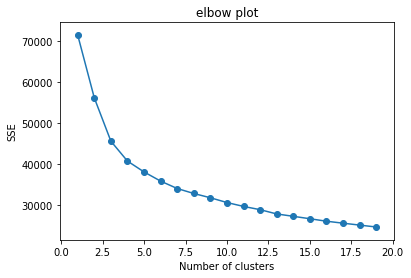

In [4]:
sse = {}

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(wine_data_scaled)
    wine_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.scatter(list(sse.keys()), list(sse.values()))
plt.title('elbow plot')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

From the above we can observe that K=5/6 is the perfect choice of K
Thus the plot shows that the number of groups to choose is 5.
Hence lets run K means algorithm for k=5 and find clusters in the data

## Making Pair wise profiling plots and labelling wines with respect to its ingredients

plotting alcohol vs pH clusters

In [5]:
wine_data.clusters.unique()

array([ 0, 18,  4, 16,  9,  7,  3, 11,  6, 15, 17,  8,  1,  5, 13,  2, 10,
       12, 14])

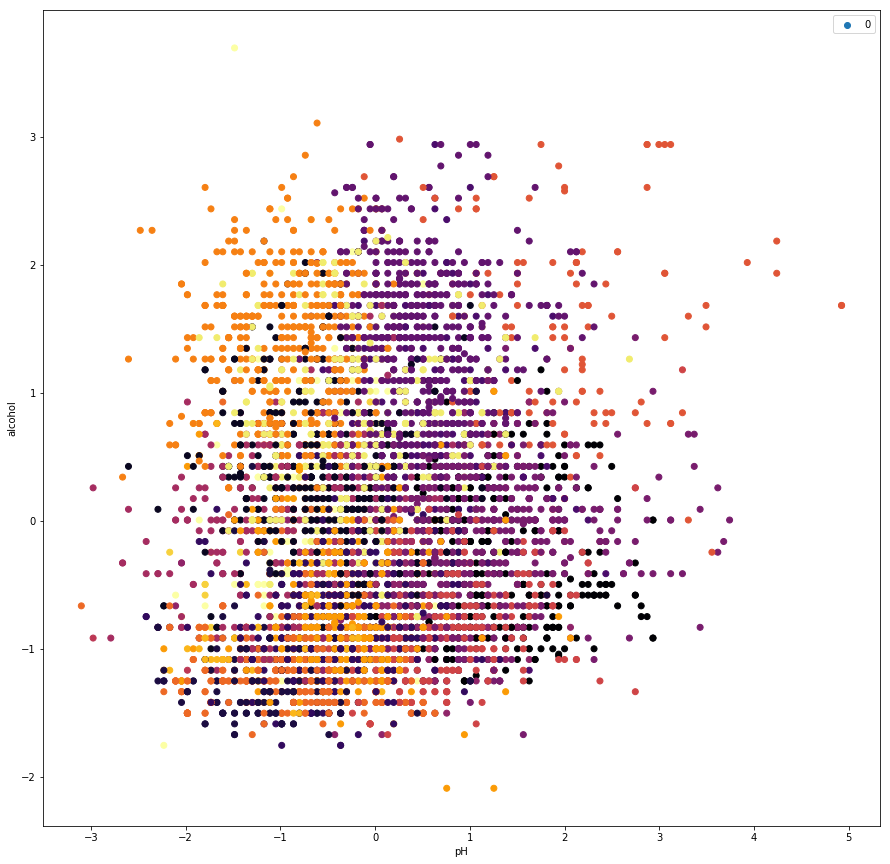

In [6]:
plt.figure(figsize=(15,15))
plt.scatter(wine_data_scaled.pH,
            wine_data_scaled.alcohol,
            c=wine_data.clusters,
            cmap='inferno')
plt.legend(wine_data.clusters.unique())
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.show()

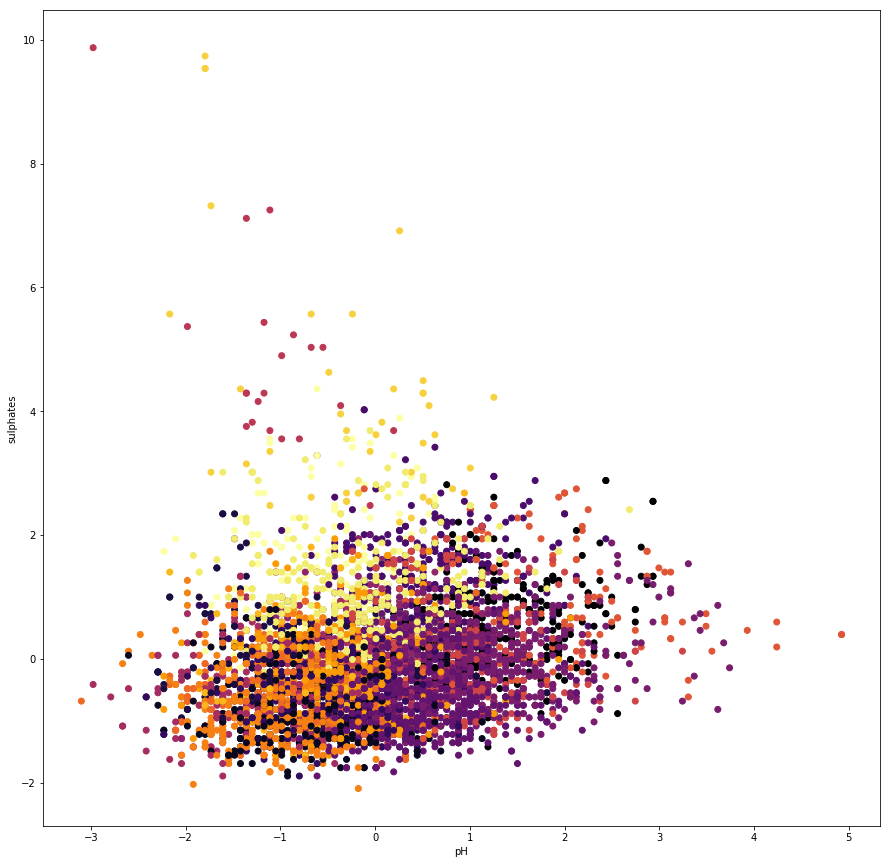

In [7]:
plt.figure(figsize=(15,15))
plt.scatter(wine_data_scaled.pH,
            wine_data_scaled.sulphates,
            c=wine_data.clusters,
            cmap='inferno')
plt.xlabel('pH')
plt.ylabel('sulphates')
plt.show()

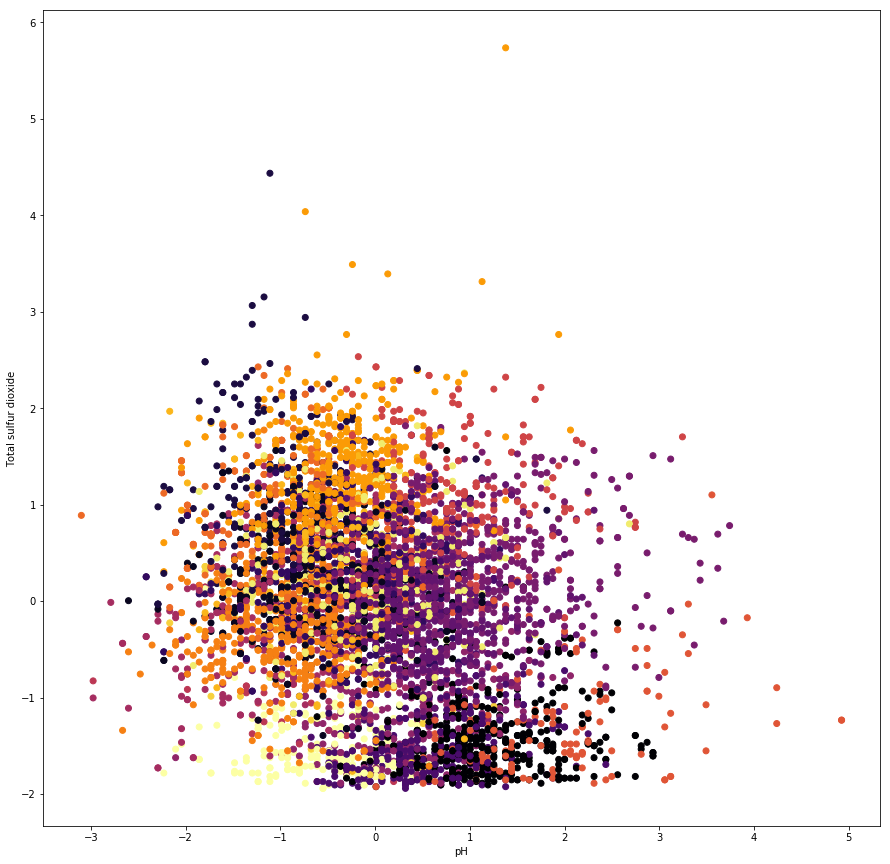

In [8]:
plt.figure(figsize=(15,15))
plt.scatter(wine_data_scaled.pH,
            wine_data_scaled['total sulfur dioxide'],
            c=wine_data.clusters,
            cmap='inferno')
plt.xlabel('pH')
plt.ylabel('Total sulfur dioxide')
plt.show()

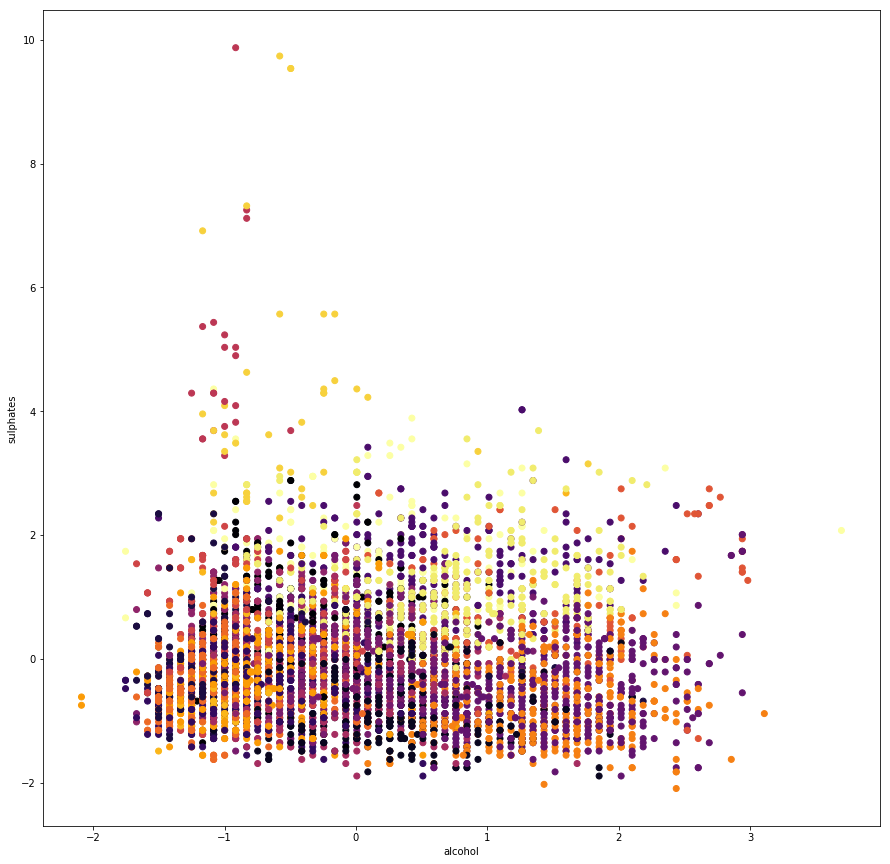

In [10]:
plt.figure(figsize=(15,15))
plt.scatter(wine_data_scaled.alcohol,
            wine_data_scaled.sulphates,
            c=wine_data.clusters,
            cmap='inferno')
plt.xlabel('alcohol')
plt.ylabel('sulphates')
plt.show()

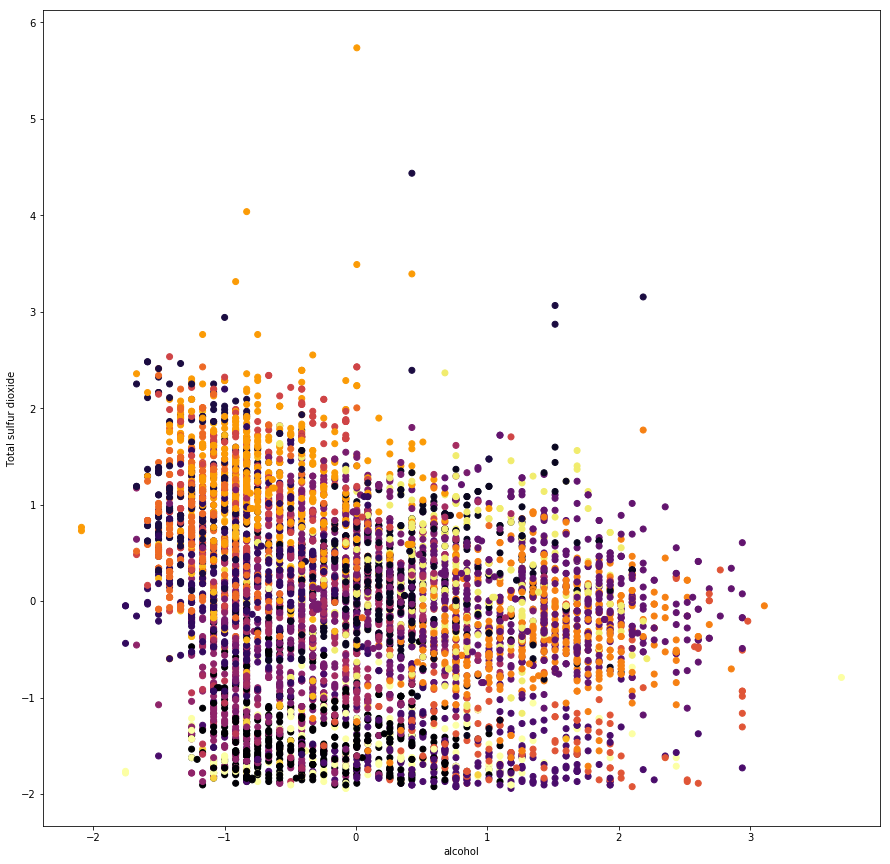

In [11]:
plt.figure(figsize=(15,15))
plt.scatter(wine_data_scaled.alcohol,
            wine_data_scaled['total sulfur dioxide'],
            c=wine_data.clusters,
            cmap='inferno')
plt.xlabel('alcohol')
plt.ylabel('Total sulfur dioxide')
plt.show()

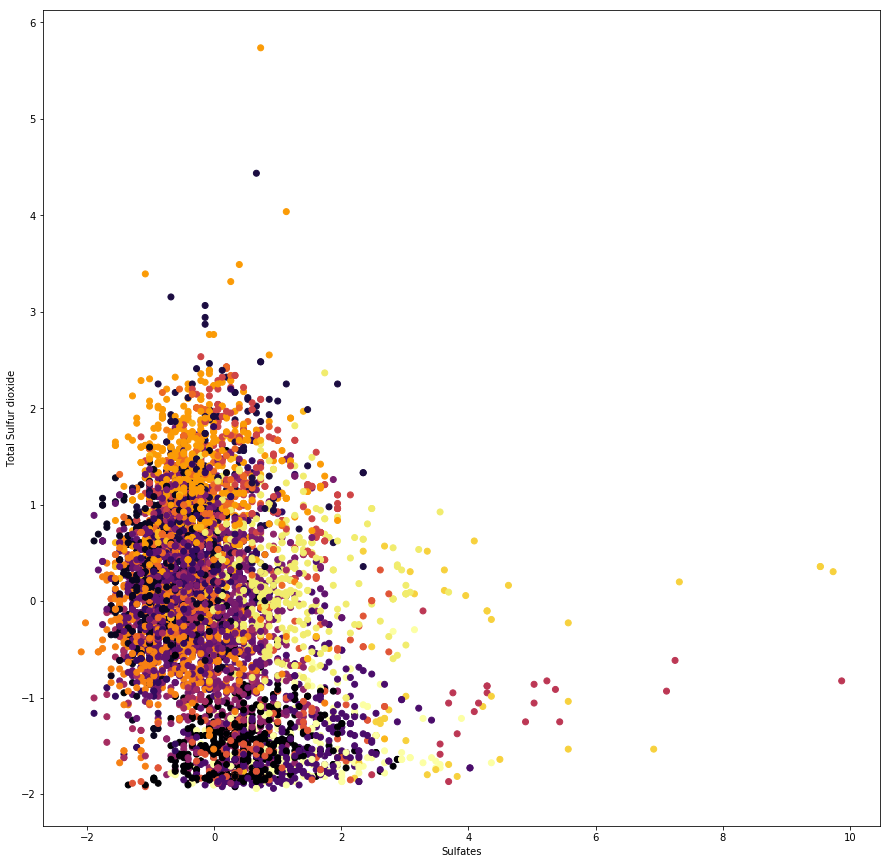

In [12]:
plt.figure(figsize=(15,15))
plt.scatter(wine_data_scaled.sulphates,
            wine_data_scaled['total sulfur dioxide'],
            c=wine_data.clusters,
            cmap='inferno')
plt.xlabel('Sulfates')
plt.ylabel('Total Sulfur dioxide')
plt.show()

# KNN Classifier

In [59]:
red_wine_data = pd.read_csv('../Dataset/winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('../Dataset/winequality-white.csv', sep=';')

wine_data = pd.concat([red_wine_data, white_wine_data])
bins = (2, 5, 6, 10)
group_names = ['bad', 'medium', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)
wine_data.iloc[:, :11].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [60]:
scaler = StandardScaler()

data = wine_data.iloc[:,:11].values
scaled_features = scaler.fit_transform(data)

wine_data_scaled = pd.DataFrame(scaled_features, index=wine_data.index, columns=wine_data.columns[:11])
wine_data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data.iloc[:, :11],
                                                    wine_data.quality,
                                                    test_size=0.2,
                                                    random_state=42)

In [84]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [85]:
knn.score(X_train, Y_train)

0.8166249759476621

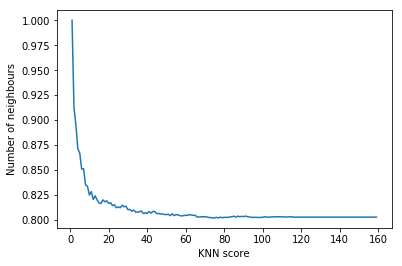

In [89]:
knn_score = []

for i in range(1,160):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)
    knn_score.append(knn.score(X_train, Y_train))
    
plt.plot(range(1, 160), knn_score)
plt.xlabel("KNN score")
plt.ylabel("Number of neighbours")
plt.show()